## Validation loss over epochs

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import numpy as np

%matplotlib inline

In [ ]:
file_path = r"..\experiments\logs\mix_en_text_de_one_fourth_asr_mt_SE_JoinEmbedding.log"

with open (file_path) as f:
    lines = f.readlines()

val_ppl = []
additional_val_ppl = []
    
for line in lines:
    if line.startswith("Validation perplexity: "):
        val_ppl.append(float(re.findall("\d+\.\d+", line)[0]))
    elif line.startswith("Validation perplexity on additional data 0: "):
        additional_val_ppl.append(float(re.findall("\d+\.\d+", line)[0]))
        
file_path = r"..\experiments\logs\mix_en_text_de_one_fourth_asr_mt_SE_JoinEmbedding_DEPI.log"

with open (file_path) as f:
    lines = f.readlines()

val_ppl_DEPI = []
additional_val_ppl_DEPI = []
    
for line in lines:
    if line.startswith("Validation perplexity: "):
        val_ppl_DEPI.append(float(re.findall("\d+\.\d+", line)[0]))
    elif line.startswith("Validation perplexity on additional data 0: "):
        additional_val_ppl_DEPI.append(float(re.findall("\d+\.\d+", line)[0]))
        
start_epoch = 3

save_folder = r"C:\Users\TuAhnDinh\OneDrive - Mediaan abs b.v\thesis\visualizations"

fig, (ax1, ax2) = plt.subplots(2, figsize=(7,5))
ax1.set_ylim(0,350)
ax2.set_ylim(0,350)

line1_asr = ax1.plot(list(range(start_epoch, 65)), val_ppl[start_epoch:], color='b', label="ASR val loss")
line1_mt = ax1.plot(list(range(start_epoch, 65)), additional_val_ppl[start_epoch:], color='r', label="MT val loss")
ax1.legend()

line2_asr = ax2.plot(list(range(start_epoch, 65)), val_ppl_DEPI[start_epoch:], color='b', label="ASR val loss")
line2_mt = ax2.plot(list(range(start_epoch, 65)), additional_val_ppl_DEPI[start_epoch:], color='r', label="MT val loss")
ax2.legend()

ax1.set_title("a) Plain zero-shot model")
ax2.set_title("b) Zero-shot model with residual connections \n in the middle layer of the shared encoder part removed")

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("epoch")
plt.ylabel("loss (ppl)")

plt.tight_layout()

# plt.savefig(f"{save_folder}/DEPI_loss.pdf", bbox_inches='tight', pad_inches=0)

## SVCCA analysis

### ON 25% DATA

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import numpy as np
%matplotlib inline


matplotlib.rcParams.update({'font.size': 30, 'font.weight': 'regular', 'font.sans-serif': 'Arial'})

labels = ['Plain', 'With \n auxiliary loss', 'With \n augmented data', 'With \n opposite data', 'With \n opposite data \n+ auxiliary loss']
zeroshot = (0.249, 0.288, 0.306, 0.232, 0.311)
finetuned = (0.300, 0.344, 0.344, 0.267, 0.376)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(2, figsize=(20, 13.2))
rects1 = axs[0].bar(x - width/2, zeroshot, width, label='Zero-shot models', color='darkorange')
rects2 = axs[0].bar(x + width/2, finetuned, width, label='Few-shot models', color='darkcyan')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('SVCCA score')
# axs[0].set_title('Similarity of text and audio encoder output using SVCCA')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend(loc='upper left')

axs[0].set_ylim(0, 0.6)

axs[0].bar_label(rects1, padding=3, fmt='%.3f', fontsize=28)
axs[0].bar_label(rects2, padding=3, fmt='%.3f', fontsize=28)
axs[0].set_title('a) SVCCA scores of zero-shot and few-shot models.', {'fontsize':30})



labels = ['Plain', 'With \nauxiliary loss', 'With \naugmented data', 'With \nopposite data', 'With \nopposite data\n+ auxiliary loss']
bleu = [4.0, 4.3, 4.8, 4.8, 5.7]
svcca = [0.300, 0.344, 0.344, 0.267, 0.376]

bleu_lab = ['base'] + ['+' + "{:.1f}".format(x-bleu[0]) for x in bleu[1:]]
svcca_lab = ['base'] + ['+' + "{:.3f}".format(x-svcca[0]) if x-svcca[0]>=0 else "{:.3f}".format(x-svcca[0]) 
                        for x in svcca[1:]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

ax2 = axs[1].twinx()
rects1 = axs[1].bar(x + width/2, svcca, width, label='SVCCA score', color='darkcyan')
rects2 = ax2.bar(x - width/2, bleu, width, label='BLEU score', color='xkcd:goldenrod')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_ylabel('SVCCA score')
ax2.set_ylabel('BLEU score')
# axs[1].set_title('Similarity of text and audio encoder output using SVCCA')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)

plt.legend([rects2, rects1], ['BLEU score', 'SVCCA score'], loc='upper left')

axs[1].set_ylim(0, 0.6)
ax2.set_ylim(0, 8)

axs[1].bar_label(rects1, labels=svcca_lab, padding=3, color='darkgreen', fmt='%.3f', fontsize=28)
ax2.bar_label(rects2, labels=bleu_lab, padding=3, color='olive', fmt='%.1f', fontsize=28)

axs[1].set_title('b) BLEU scores and SVCCA scores of few-shot models. \nNumbers on the bars are comparision to the plain model', {'fontsize':30})

plt.tight_layout()

save_folder = r"C:\Users\TuAhnDinh\OneDrive - Mediaan abs b.v\thesis\visualizations"
plt.savefig(f"{save_folder}/models25.pdf", bbox_inches = 'tight', pad_inches = 0)

### ON FULL DATA

(0.0, 0.5450980392156862, 0.5450980392156862, 1.0)


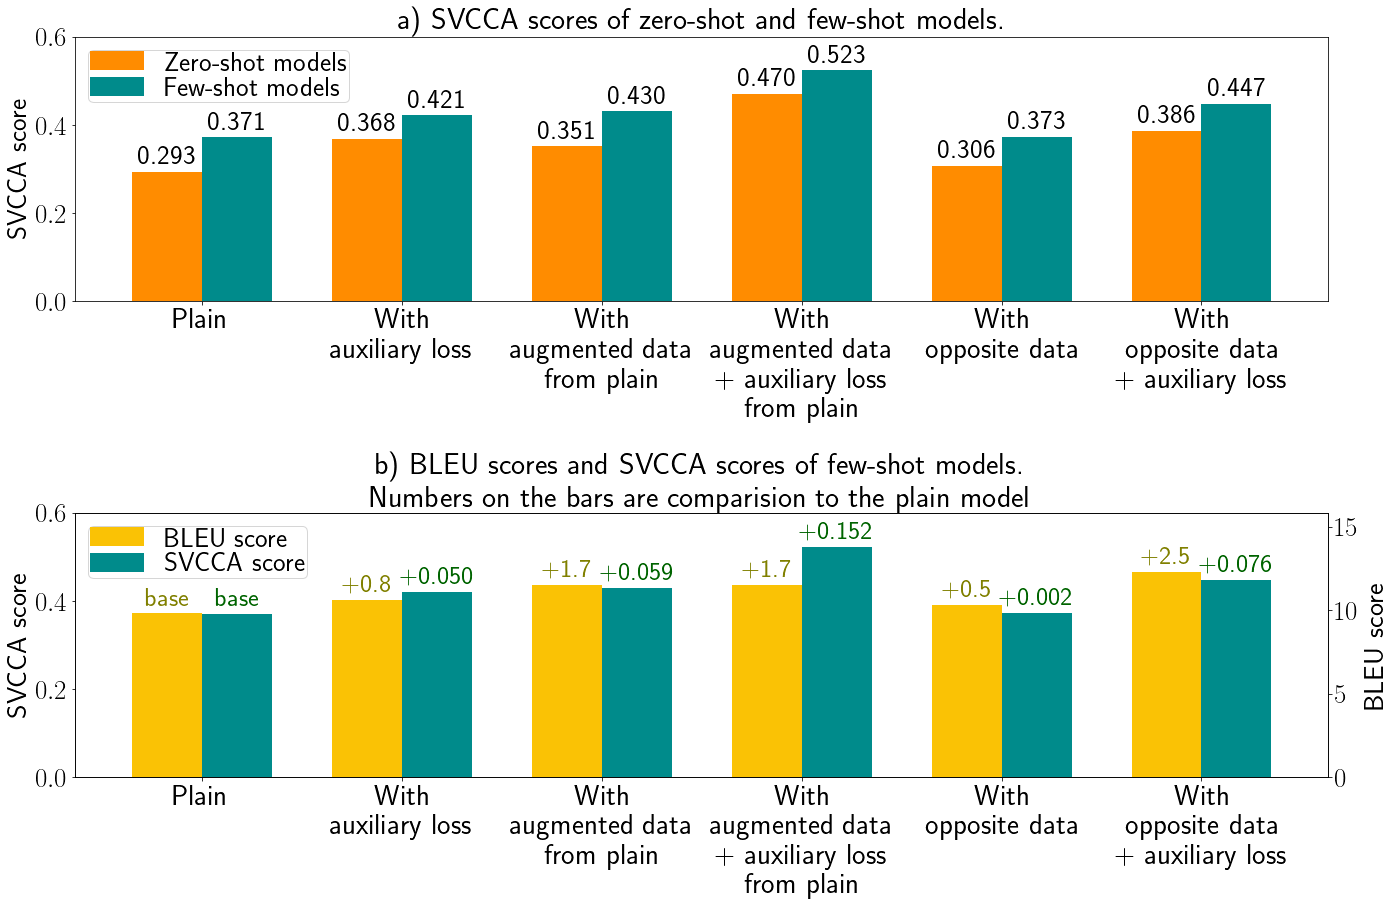

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import numpy as np
%matplotlib inline

# Params suitable for embed in Latex
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 27, 'font.weight': 'regular', 'font.sans-serif': 'Computer Modern Sans serif'})

labels = ['Plain', 'With \nauxiliary loss', 'With \naugmented data\nfrom plain', 'With \naugmented data\n+ auxiliary loss\nfrom plain', 'With \nopposite data', 'With \nopposite data\n+ auxiliary loss']
zeroshot = (0.293, 0.368, 0.351, 0.470, 0.306, 0.386)
finetuned = (0.371, 0.421, 0.430, 0.523, 0.373, 0.447)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(2, figsize=(20, 13.2))
rects1 = axs[0].bar(x - width/2, zeroshot, width, label='Zero-shot models', color='darkorange')
rects2 = axs[0].bar(x + width/2, finetuned, width, label='Few-shot models', color='darkcyan')
print(rects2.patches[0].get_facecolor())

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('SVCCA score')
# axs[0].set_title('Similarity of text and audio encoder output using SVCCA')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontdict={'fontsize':29})
axs[0].legend(loc='upper left', labelspacing=0.05, borderpad=0.05)

axs[0].set_ylim(0, 0.6)

axs[0].bar_label(rects1, padding=3, fmt='%.3f')
axs[0].bar_label(rects2, padding=3, fmt='%.3f')

# plt.hlines(y=0.2494, xmin=-width, xmax=(4+width), color='black')

axs[0].set_title('a) SVCCA scores of zero-shot and few-shot models.', {'fontsize':30})




labels = ['Plain', 'With \nauxiliary loss', 'With \naugmented data\nfrom plain', 'With \naugmented data\n+ auxiliary loss\nfrom plain', 'With \nopposite data', 'With \nopposite data\n+ auxiliary loss']
bleu = [9.8, 10.6, 11.5, 11.5, 10.3, 12.3]
svcca = [0.371, 0.421, 0.430, 0.523, 0.373, 0.447]

bleu_lab = ['base'] + ['+' + "{:.1f}".format(x-bleu[0]) for x in bleu[1:]]
svcca_lab = ['base'] + ['+' + "{:.3f}".format(x-svcca[0]) if x-svcca[0]>=0 else "{:.3f}".format(x-svcca[0]) 
                        for x in svcca[1:]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

ax2 = axs[1].twinx()
rects1 = axs[1].bar(x + width/2, svcca, width, label='SVCCA score', color='darkcyan')
rects2 = ax2.bar(x - width/2, bleu, width, label='BLEU score', color='xkcd:goldenrod')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_ylabel('SVCCA score', fontdict={'fontsize':28})
ax2.set_ylabel('BLEU score', fontdict={'fontsize':28})
# axs[1].set_title('Similarity of text and audio encoder output using SVCCA')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontdict={'fontsize':29})

plt.legend([rects2, rects1], ['BLEU score', 'SVCCA score'], loc='upper left', labelspacing=0.05, borderpad=0.05)

axs[1].set_ylim(0, 0.6)
ax2.set_ylim(0, 15.836)

axs[1].bar_label(rects1, labels=svcca_lab, padding=3, color='darkgreen', fontsize=26)
ax2.bar_label(rects2, labels=bleu_lab, padding=3, color='olive', fontsize=26)

# plt.hlines(y=0.2494, xmin=-width, xmax=(4+width), color='black')

axs[1].set_title('b) BLEU scores and SVCCA scores of few-shot models. \nNumbers on the bars are comparision to the plain model', {'fontsize':30})


fig.tight_layout()

save_folder = r"C:\Users\TuAhnDinh\OneDrive - Mediaan abs b.v\thesis\visualizations"
plt.savefig(f"{save_folder}/modelsfull.pdf", bbox_inches = 'tight', pad_inches = 0)




### (Same figures but separated)